In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
from scipy.interpolate import interp1d, interp2d

import torch
import torch.nn as nn
from scipy import integrate
from inteq import SolveFredholm

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from itertools import product as it_prod

# plotting packages 
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install scikit-optimize
import warnings
warnings.filterwarnings('ignore')

import os
import sys

from lightgbm import LGBMRegressor

from skopt import BayesSearchCV

from mpmath import mp
mp.dps = 30

# Set the environment variable to suppress LightGBM warnings
os.environ['LGBM_CONFIG'] = '--log_level=3'

# Redirect warnings to a file
sys.stderr = open('warnings.txt', 'w')


# Opening file
file1 = open('C:\\Users\\matve\\Documents\\Python Scripts\\junior_quant_task\\test.txt', 'r')
count = 0
ob_num = 0
ob = [[0] * 3 for _ in range(40)]
ordbook_test = [[0] * 2 for _ in range(10000)]


for line in file1:
    if ("price" in line.strip()):
#         print(pd.DataFrame(data=ob))
        ob_num = 0
        ordbook_test[count][1] = tuple([x for x in line.strip().split(' price: ')])
        ordbook_test[count][0] = pd.DataFrame(data=ob)
        ordbook_test[count][0].columns = ['price','amount','side']
        count +=1
    elif not ("=" in line.strip()):
        line = line.strip().split('\t')
        ob[ob_num][0] = int(line[0])
        ob[ob_num][1] = int(line[1])
        ob[ob_num][2] = line[2]
        ob_num += 1
 
# Closing files
file1.close()

ordbook_test = [row for row in ordbook_test if row[1] != 0]

print(np.array(ordbook_test))

[[     price  amount  side
  0   130535      20  Sell
  1   130530       3  Sell
  2   130525       9  Sell
  3   130520      35  Sell
  4   130515      10  Sell
  5   130510      24  Sell
  6   130505      24  Sell
  7   130500     202  Sell
  8   130495     104  Sell
  9   130490      16  Sell
  10  130485       2  Sell
  11  130480      18  Sell
  12  130475      28  Sell
  13  130470       7  Sell
  14  130465      15  Sell
  15  130460       6  Sell
  16  130455      10  Sell
  17  130450      22  Sell
  18  130445       2  Sell
  19  130440      15  Sell
  20  130435      56   Buy
  21  130430      11   Buy
  22  130425       9   Buy
  23  130420      15   Buy
  24  130415      44   Buy
  25  130410      51   Buy
  26  130405      35   Buy
  27  130400      53   Buy
  28  130395      22   Buy
  29  130390      34   Buy
  30  130385      44   Buy
  31  130380      17   Buy
  32  130375       4   Buy
  33  130370       8   Buy
  34  130365      20   Buy
  35  130360      37   Buy
 

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 50)

import torch
import torch.nn as nn

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import d2_absolute_error_score

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# plotting packages 
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os
from termcolor import colored

# Opening file
file1 = open('C:\\Users\\matve\\Documents\\Python Scripts\\junior_quant_task\\train.txt', 'r')
count = 0
ob_num = 0
ob = [[0] * 3 for _ in range(40)]
ordbook = [[0] * 2 for _ in range(10000)]


for line in file1:
    if ("price" in line.strip()):
#         print(pd.DataFrame(data=ob))
        ob_num = 0
        ordbook[count][1] = tuple([x for x in line.strip().split(' price: ')])
        ordbook[count][0] = pd.DataFrame(data=ob)
        ordbook[count][0].columns = ['price','amount','side']
        count +=1
    elif not ("=" in line.strip()):
        line = line.strip().split('\t')
        ob[ob_num][0] = int(line[0])
        ob[ob_num][1] = int(line[1])
        ob[ob_num][2] = line[2]
        ob_num += 1
 
# Closing files
file1.close()

ordbook = [row for row in ordbook if row[1] != 0]


In [4]:
# FUNCTION FOR PLOTS
def OB_plot(lst, n_lst):
    num_plots = len(n_lst)
    fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 5))

    if num_plots == 1:
        axes = [axes]  # If there's only one plot, convert it to a list of length 1

    for i, n in enumerate(n_lst):
        obsample = lst[n][0]
        axes[i].set_title('Order Book №' + str(n))
        
        sns.ecdfplot(x="price", weights="amount", stat="count", complementary=True, data=obsample[obsample.side == 'Buy'], ax=axes[i], color='g')
        sns.ecdfplot(x="price", weights="amount", stat="count", data=obsample[obsample.side == 'Sell'], ax=axes[i], color='r')
        axes[i].set_ylim(-5, max(lst[n][0]['amount'][21:].sum(), lst[n][0]['amount'][:20].sum()) + 180)
        
        l1 = axes[i].vlines(int(app_func(lst, n)), 0, max(lst[n][0]['amount'][21:].sum(), lst[n][0]['amount'][:20].sum()), color='blue', ls='-', 
                            label="Potential " + str(lst[n][1][0]).upper())
        
        axes[i].text((lst[n][0]['price'][19] + lst[n][0]['price'][20]) / 2 - 20, 
                     max(lst[n][0]['amount'][21:].sum(), lst[n][0]['amount'][:20].sum()) + 100, 
                     'Spread = ' + str(lst[n][0]['price'][19] - lst[n][0]['price'][20]), fontsize=11, 
                     bbox=dict(facecolor='grey', alpha=0.2))
        axes[i].text(((lst[n][0]['price'][19] + lst[n][0]['price'][20])/2) - 30, 
                     max(lst[n][0]['amount'][21:].sum(), lst[n][0]['amount'][:20].sum()) + 25, 
                     'MidPrice =' + str('{:_}'.format(int((lst[n][0]['price'][19] + lst[n][0]['price'][20])/2))), fontsize=11, 
                     bbox=dict(facecolor='blue', alpha=0.2))
        
        axes[i].legend(fontsize=11)
        axes[i].set_xlabel("Price")
        axes[i].set_ylabel("Coins amount")

    plt.tight_layout()  # Ensures that the subplots do not overlap
    plt.show()


In [5]:
# APROXIMATIG FUNCTION
def app_func(lst, n):
    
    ob = lst[n][0]
    
    direction = 1 if lst[n][1][0] == 'Sell' else -1
    mid_price = (ob['price'][19]+ob['price'][20])/2
    spread = (((ob['price'][19]-ob['price'][20])/ob['price'][19])**(-1))/7000
    ask_vol20 = ob['amount'][:20].sum()
    bid_vol20 = ob['amount'][20:].sum()
    ask_vol5 = ob['amount'][15:20].sum()
    bid_vol5 = ob['amount'][20:25].sum()
    ask_vol2 = ob['amount'][18:20].sum()
    bid_vol2 = ob['amount'][20:22].sum()
    ask_vol1 = ob['amount'][19:20].sum()
    bid_vol1 = ob['amount'][20:21].sum()
    
    return np.around((mid_price + 
                      direction*(0.2*(bid_vol1/ask_vol1)**direction+
                                  3*(bid_vol2/ask_vol2)**direction+
                                  1*(bid_vol5/ask_vol5)**direction+
                                  (bid_vol20/ask_vol20)**direction)+
                      spread**2)/5)*5

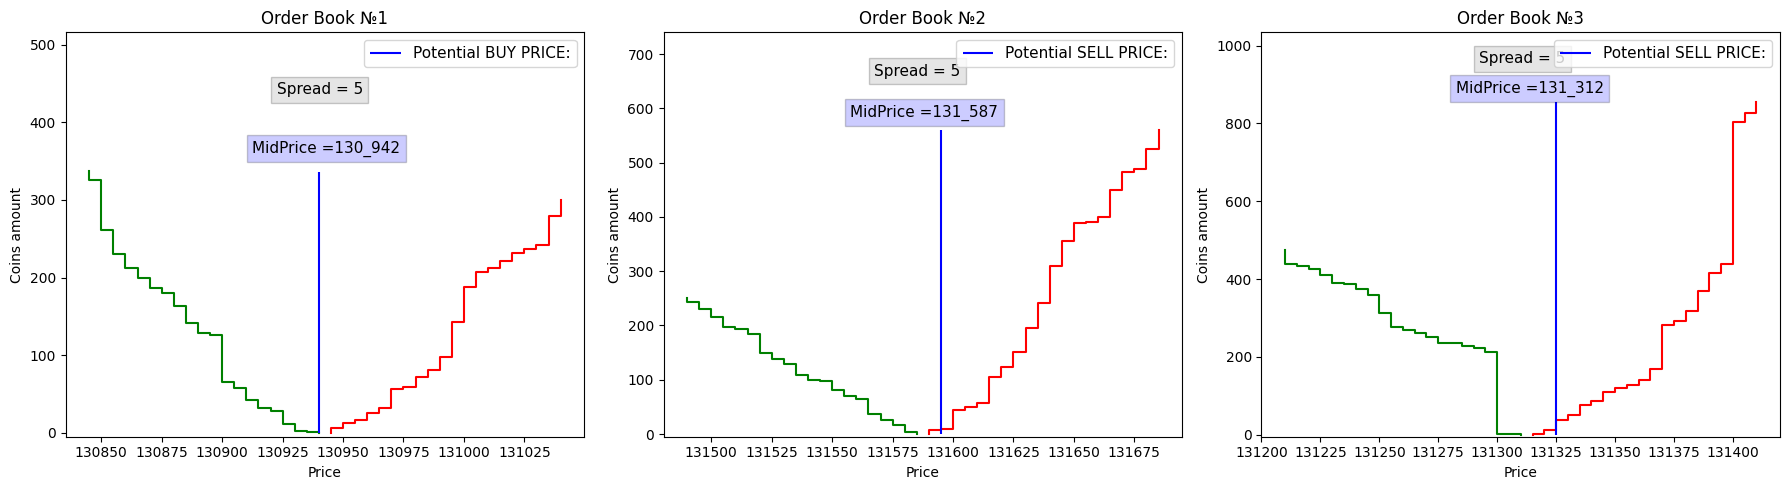

In [6]:
n = [1,2, 3]
OB_plot(ordbook_test, n)

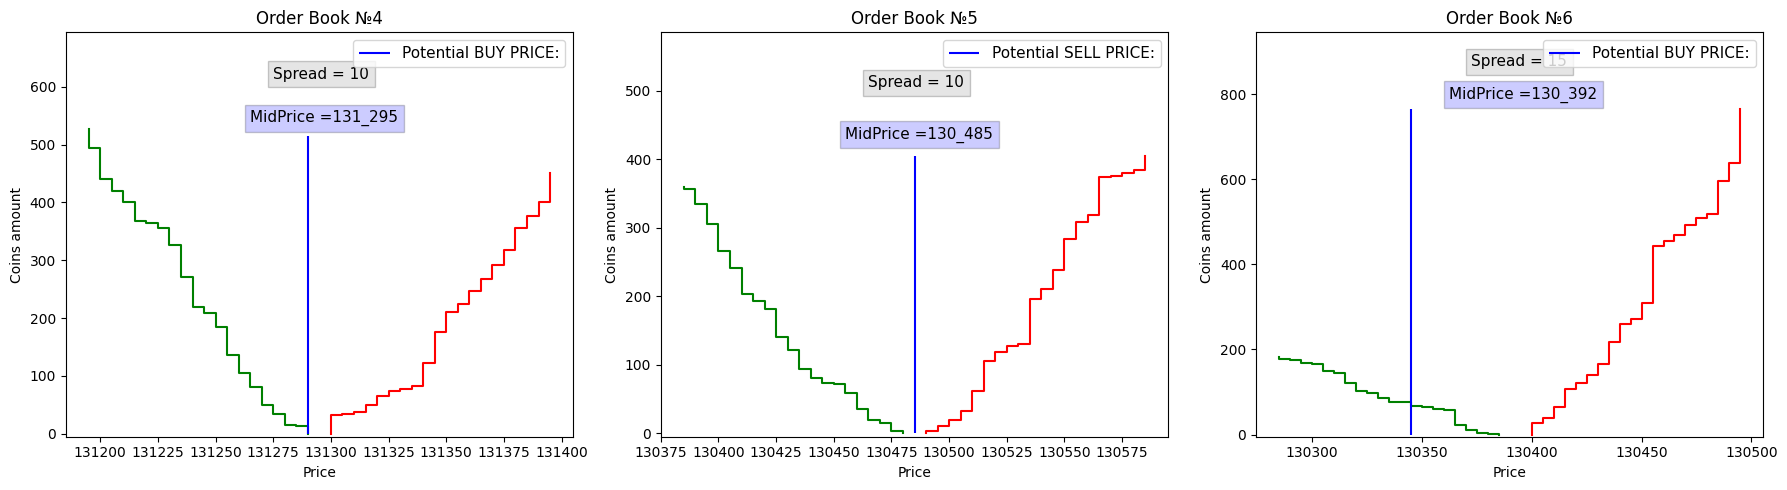

In [7]:
n = [4,5, 6]
OB_plot(ordbook_test, n)

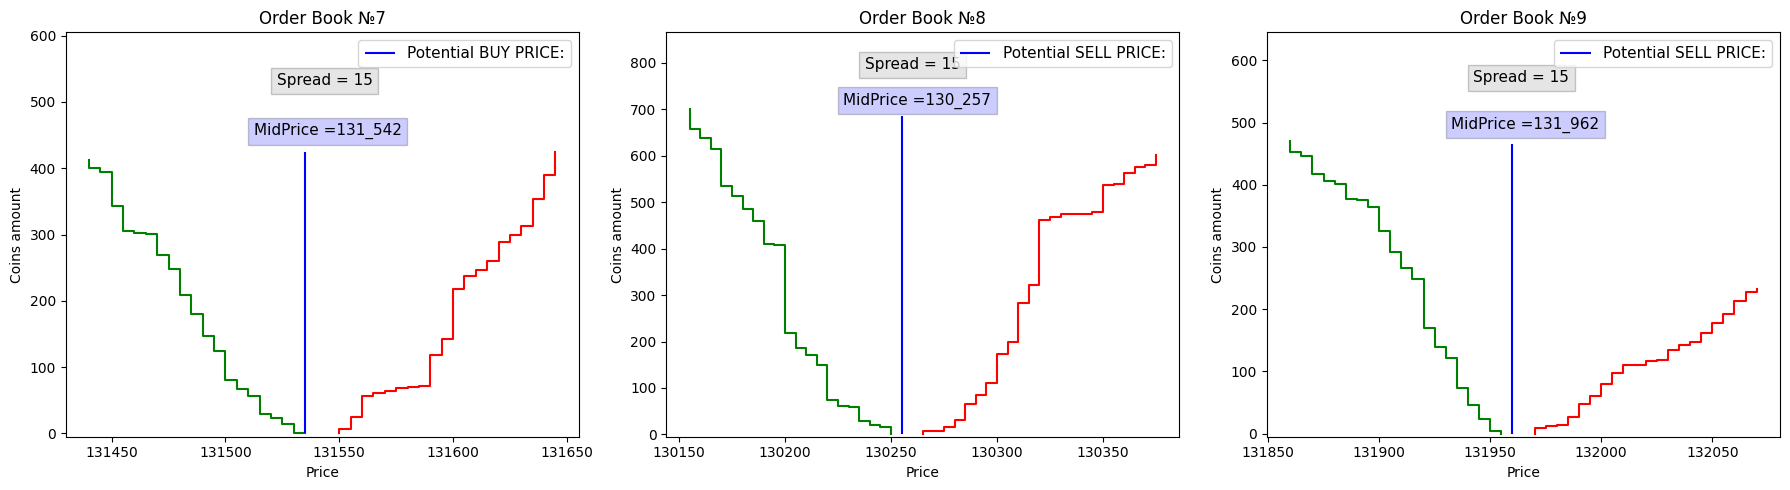

In [8]:
n = [7,8 , 9 ]
OB_plot(ordbook_test, n)

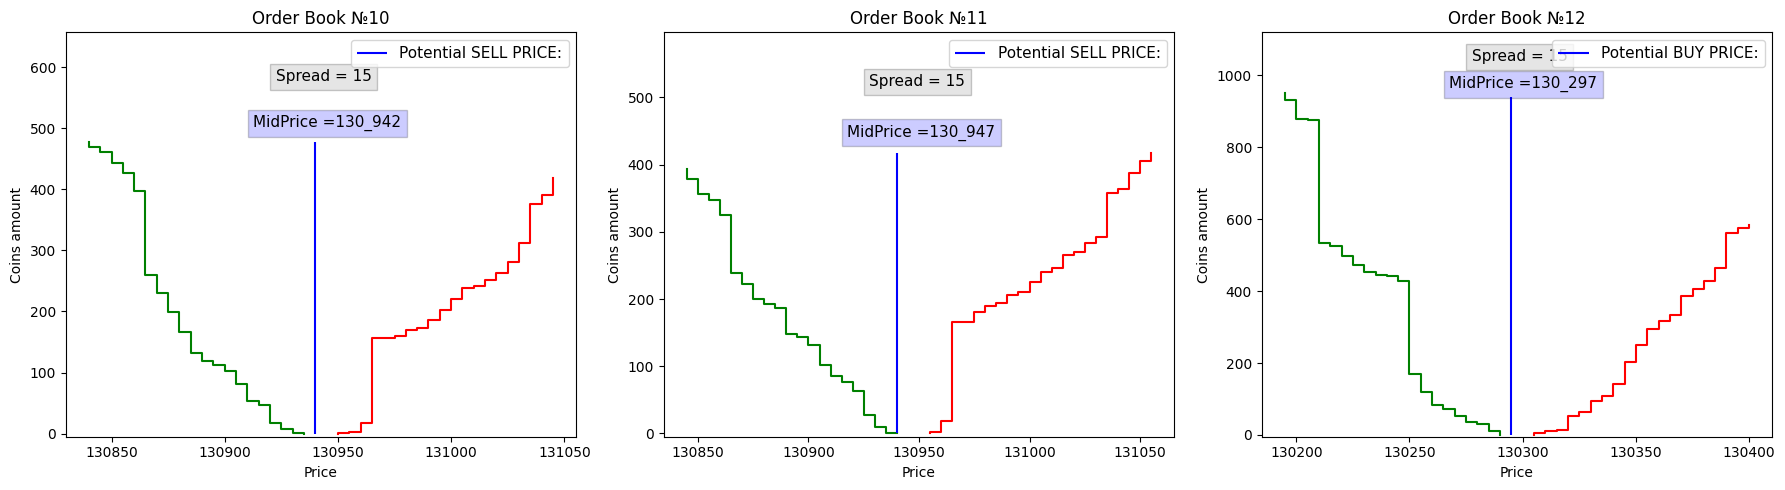

In [9]:
n = [10,11, 12]
OB_plot(ordbook_test, n)

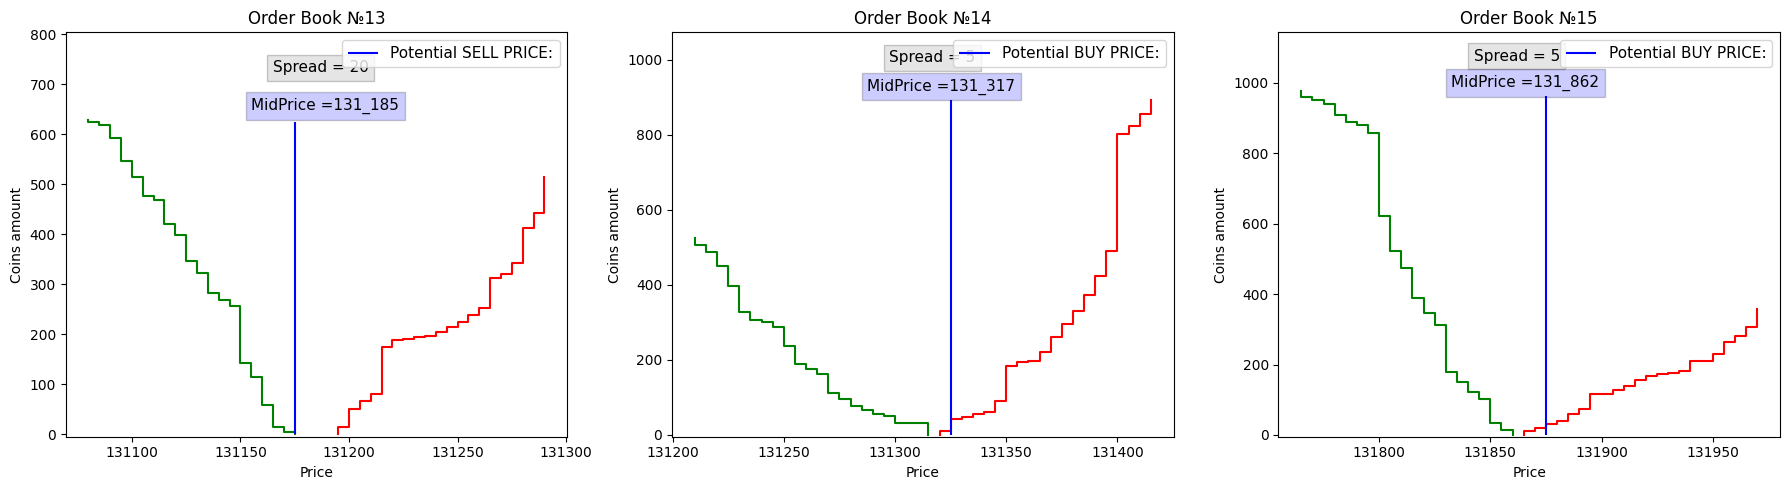

In [10]:
n = [13,14, 15]
OB_plot(ordbook_test, n)

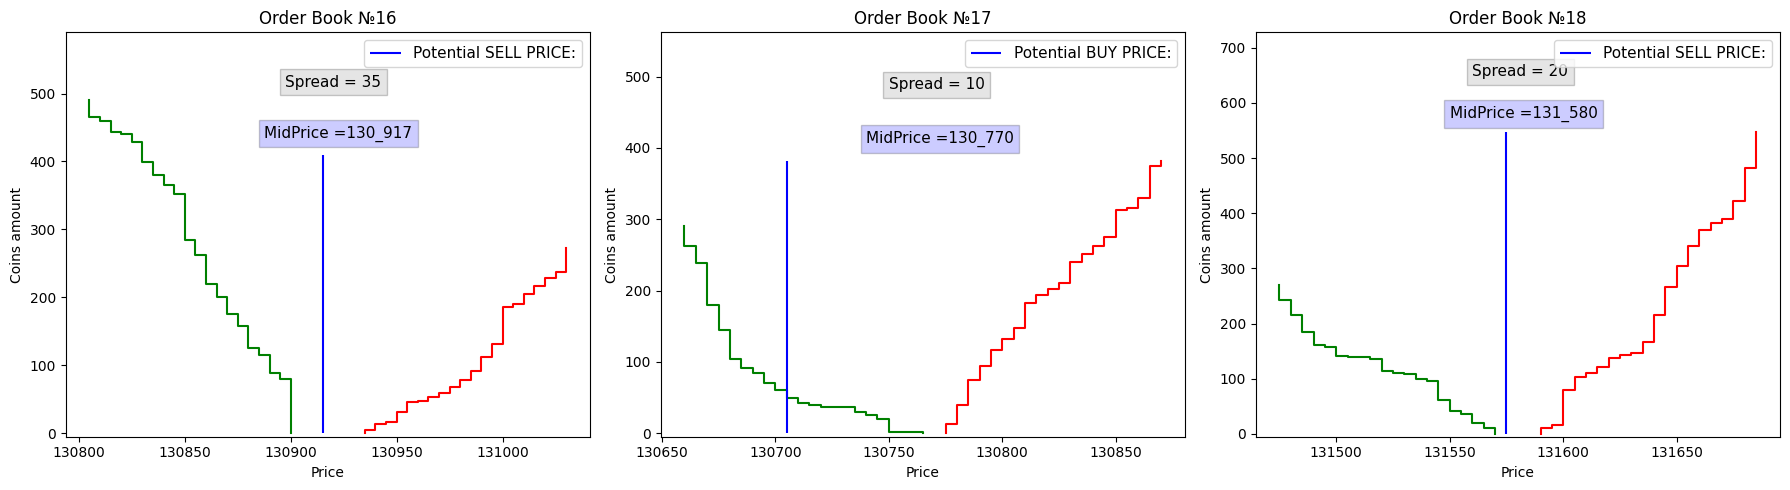

In [11]:
n = [16,17, 18]
OB_plot(ordbook_test, n)

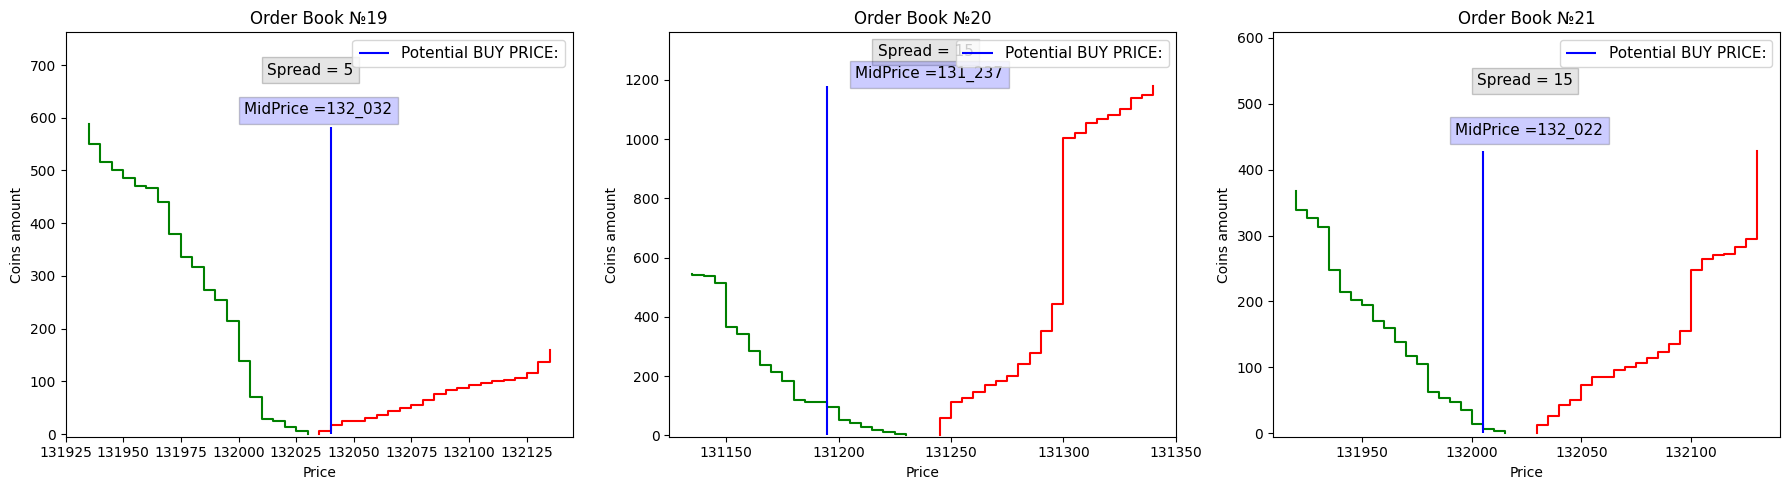

In [12]:
n = [19,20, 21]
OB_plot(ordbook_test, n)

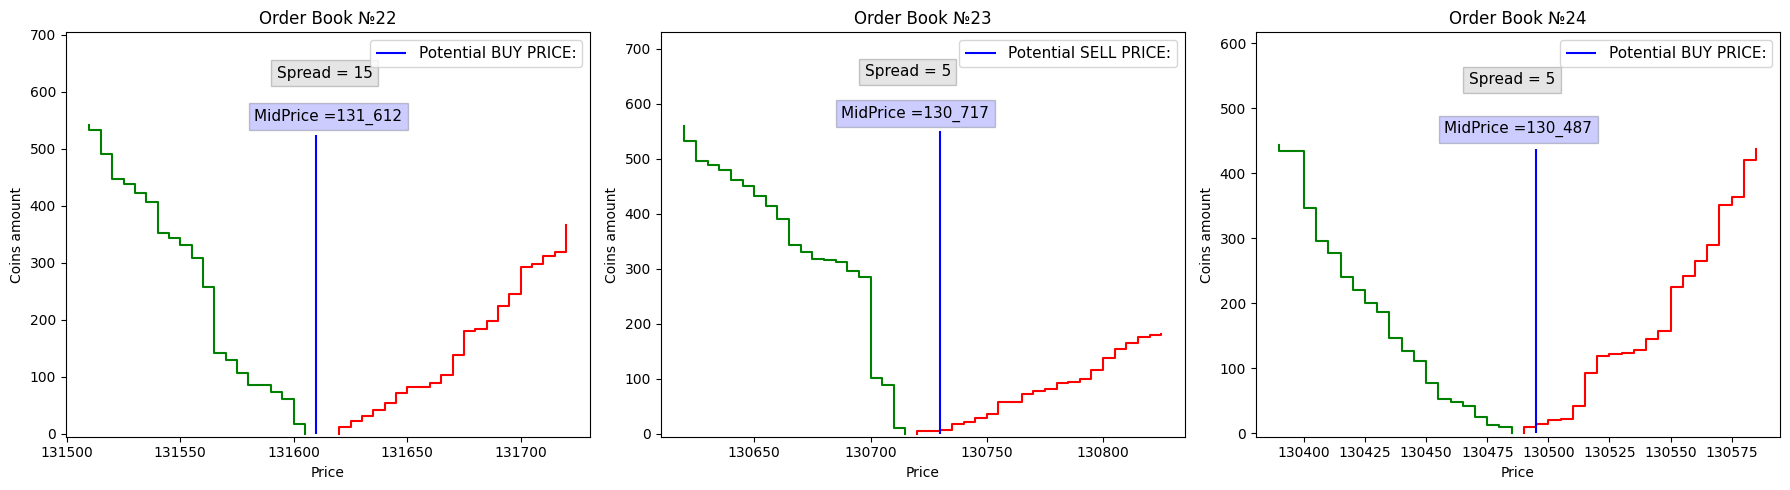

In [13]:
n = [22,23, 24]
OB_plot(ordbook_test, n)

In [14]:
from sklearn.preprocessing import minmax_scale, scale

In [15]:
X_train = np.array([ob[0].drop('side', axis = 1).stack().astype(int).to_numpy() for ob in ordbook])
Y_train = np.array([int(ob[1][1]) for ob in ordbook])
s_train = np.array([ob[1][0]=='Sell' for ob in ordbook])

In [16]:
X_test = np.array([ob[0].drop('side', axis = 1).stack().astype(int).to_numpy() for ob in ordbook_test])
# Y_train = np.array([int(ob[1][1]) for ob in ordbook])
s_test = np.array([ob[1][0]=='Sell price:' for ob in ordbook_test])

In [17]:
X_train

array([[130990,     41, 130985, ...,     31, 130785,     13],
       [130995,     34, 130990, ...,     53, 130790,     25],
       [131030,     11, 131025, ...,      8, 130825,      9],
       ...,
       [131675,     26, 131670, ...,      5, 131475,      6],
       [131675,     26, 131670, ...,     18, 131475,      6],
       [131670,     29, 131665, ...,      4, 131465,     32]])

In [18]:
deltas_test = np.zeros((9000, 25))
import time

start = time.time()


for i in range(0,9000):
    for j in range(0,25):
        deltas_test[i, j] = abs(ordbook[i][0]['amount']-ordbook_test[j][0]['amount']).sum()

end = time.time()
print(end - start)
        
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.DataFrame(deltas_test)

36.78037095069885


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1024.0,726.0,827.0,1382.0,776.0,767.0,1074.0,690.0,1183.0,783.0,827.0,649.0,1466.0,841.0,1112.0,993.0,784.0,686.0,715.0,742.0,1458.0,790.0,825.0,988.0,804.0
1,1005.0,555.0,708.0,1293.0,581.0,670.0,971.0,591.0,1038.0,730.0,852.0,720.0,1265.0,948.0,965.0,1138.0,741.0,591.0,742.0,725.0,1293.0,663.0,602.0,845.0,707.0
2,891.0,699.0,630.0,1145.0,813.0,554.0,803.0,661.0,1192.0,620.0,680.0,728.0,1201.0,962.0,1101.0,1154.0,619.0,637.0,702.0,785.0,1371.0,637.0,802.0,781.0,705.0
3,875.0,569.0,654.0,1179.0,677.0,570.0,953.0,529.0,860.0,632.0,864.0,800.0,1245.0,1014.0,1015.0,1138.0,719.0,609.0,654.0,751.0,1319.0,727.0,698.0,819.0,629.0
4,663.0,645.0,732.0,1257.0,683.0,600.0,857.0,789.0,1124.0,626.0,838.0,794.0,1357.0,902.0,1013.0,1138.0,687.0,667.0,708.0,755.0,1511.0,769.0,790.0,825.0,643.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,1157.0,717.0,694.0,1247.0,703.0,786.0,939.0,695.0,1140.0,930.0,898.0,910.0,1329.0,1038.0,995.0,1122.0,929.0,825.0,846.0,931.0,1471.0,961.0,762.0,1077.0,759.0
8996,933.0,865.0,780.0,1299.0,731.0,728.0,1033.0,743.0,1296.0,746.0,998.0,964.0,1293.0,1008.0,1081.0,934.0,803.0,899.0,932.0,889.0,1525.0,849.0,766.0,987.0,829.0
8997,1042.0,814.0,893.0,1318.0,780.0,841.0,1050.0,772.0,1083.0,839.0,781.0,969.0,1348.0,777.0,1172.0,849.0,724.0,922.0,841.0,872.0,1460.0,904.0,759.0,1044.0,806.0
8998,1012.0,758.0,809.0,1282.0,730.0,765.0,1016.0,724.0,1023.0,765.0,759.0,911.0,1332.0,839.0,1104.0,871.0,696.0,906.0,777.0,746.0,1446.0,788.0,721.0,960.0,776.0


In [31]:
t=pd.DataFrame(deltas_test).stack()
t = t[t>0].sort_values()
t.xs(3, level = 1)

3636     755.0
3692     788.0
3977     813.0
3687     828.0
286      832.0
         ...  
358     3690.0
351     3693.0
348     3727.0
357     3732.0
347     3781.0
Length: 9000, dtype: float64